<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/DIP_00_00_opencv_load_write_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import The Required Libraries

In [13]:
import numpy as np
import cv2
import sys

In [2]:
import sys
IN_COLAB = 'google.colab' in sys.modules
IN_COLAB

True

# Load sample images from skimage.data

skimage is an image processing libary from sci-kit family of packages. We will use some images provided by skimage.

In [3]:
from skimage import data


In [4]:
#from skimage.color import rgb2gray
#from skimage import img_as_ubyte,img_as_float

cat = data.chelsea() # take the test image of cat!
astro = data.astronaut()

## check image (or display image)

Orignal method

* `cv2.imshow("cat_iamge",cat)`

The alternative method for google colab

* `cv2_imshow(cat)`

> from google.colab.patches import cv2_imshow

In [5]:
def ds_imshow(img, win_title='win_title'):
  if IN_COLAB:
    from google.colab.patches import cv2_imshow
    cv2_imshow(img)
  else:
    cv2.imshow(win_title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

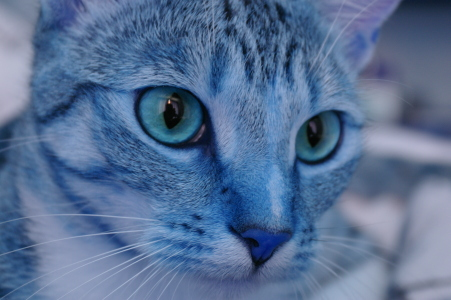

(300, 451, 3)

In [6]:
ds_imshow(cat,'test_cat')
cat.shape

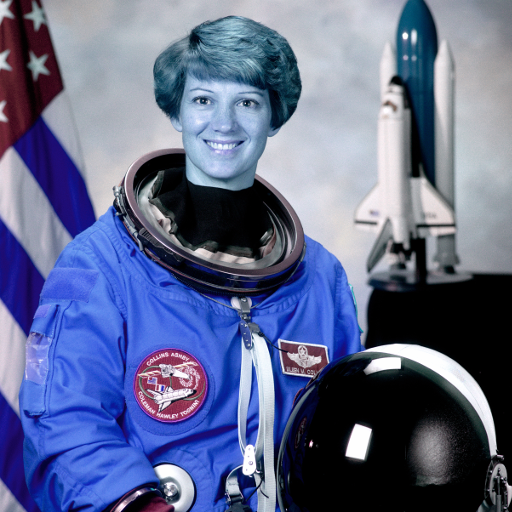

(512, 512, 3)

In [7]:
ds_imshow(astro,'test_astro')
astro.shape

We can see something wrong.

It's because opencv uses BGR color space but skimage uses RGB. To show a proper image color, we should change the color space

# Using Matplotlib

* Matplotlib is a plotting library for Python which gives you wide variety of plotting methods.
* You will see them in coming articles. : [Ref.](https://matplotlib.org/api/pyplot_api.html)
* Here, you will learn how to display image with Matplotlib. You can zoom images, save it etc using Matplotlib.

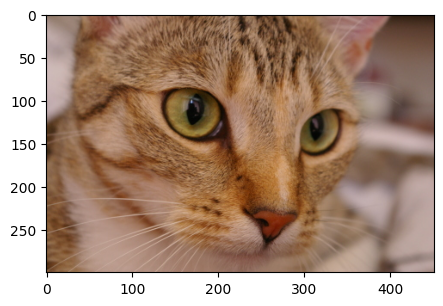

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.subplot(111); plt.imshow(cat)
plt.show()

# Warning

Color image loaded by OpenCV is in **BGR** mode. But Matplotlib displays in **RGB** mode. So color images will no be displayed correctly in Matplotlib if image is read with OpenCV.

* There is a slight difference in pixel ordering in OpenCV and Matplotlib.

So when you display an image loaded in OpenCV using python, you may need to convert it into RGB mode. Below method demonstrate it:

In [10]:
cat_cv = cat[...,::-1]
astro_cv = cat[...,::-1]

# Save an image

* `cv2.imwrite('file_name', img)`

In [11]:
cv2.imwrite("cat_cv.tif"  ,cat_cv  )
cv2.imwrite("astro_cv.bmp",astro_cv)

True

# Read an image

`cv2.imread()` 를 통해 이미지를 읽어들임.

[`cv.imread` 에 대한 참고자료](https://dsaint31.tistory.com/805)



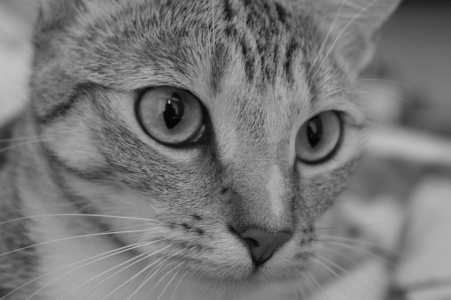

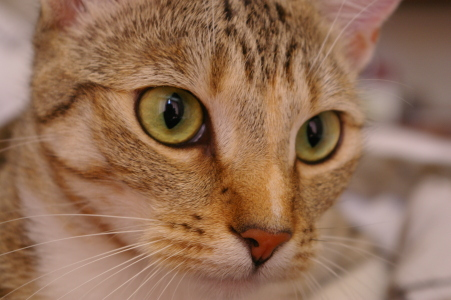

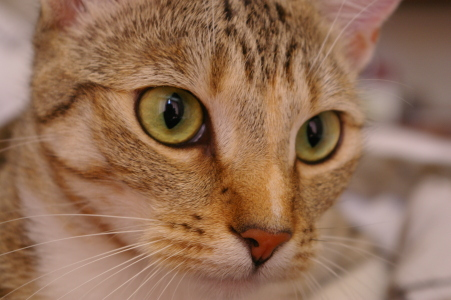

In [17]:
# Load an color image in grayscale
img = cv2.imread(
    "cat_cv.tif",
    0, # cv2.IMREAD_GRAYSCALE
    ) # Even if the image path is wrong, it won't throw any error
if img is None:
  sys.exit('Error : the image path is wrong!')

new_cat_cv   = cv2.imread("cat_cv.tif") # default flag: cv2.IMREAD_COLOR
new_astro_cv = cv2.imread("astro_cv.bmp", 1) #cv2.IMREAD_COLOR

ds_imshow(img)
ds_imshow(new_cat_cv)
ds_imshow(new_astro_cv)

# Note :

image를 보여주는 library와 읽어들이는 library를 맞춰줘야 한다.

> 특히 opencv는 BGR Color space를 이용하므로, 주의할 것.

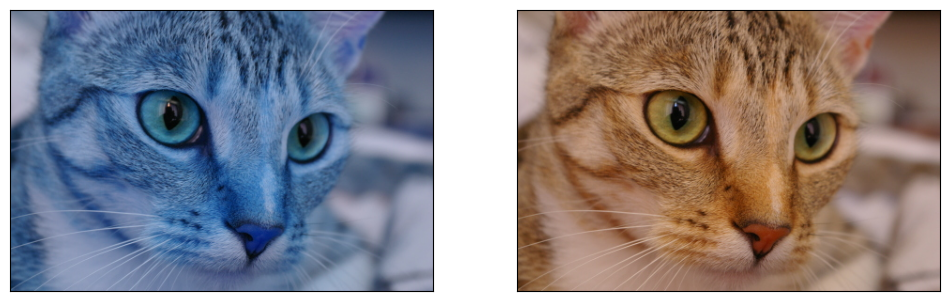

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('cat_cv.tif') #BGR

# b,g,r = cv2.split(img)
# img2 = cv2.merge([r,g,b])
img2 = img[:,:,::-1] # faster version. #RGB

plt.figure(figsize=(12,12))
plt.subplot(121); plt.imshow(img)  # BGR
plt.xticks([]); plt.yticks([])
plt.subplot(122); plt.imshow(img2) # RGB, expects true color
plt.xticks([]); plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

## `cv2.IMREAD_UNCHANGED` 옵션 사용하기.

alpha채널이 있는 경우에는 `cv2.IMREAD_UNCHANGED` 옵션이어야 제대로 로딩이 가능함.

### URL로부터 image load.

`request` 모듈을 이용하여 alpha 채널이 있는 image 저장.



In [ ]:
url = 'https://raw.githubusercontent.com/dsaint31x/OpenCV_Python_Tutorial/master/images/opencv_logo.png'

In [ ]:
import requests

image_ndarray = np.asarray(bytearray(requests.get(url).content), dtype=np.uint8)
img = cv2.imdecode(image_ndarray, cv2.IMREAD_UNCHANGED)
print(f'shape of img :{img.shape}')
cv2.imwrite('opencv_logo.png',img)

shape of img :(120, 98, 4)


True

### RGBA color space 읽어들이기

다음은 4개 채널을 가진 이미지를 읽어들이는 예로, channel이 4로 나오는 것을 확인할 수 있음.

In [ ]:
img = cv2.imread('opencv_logo.png', cv2.IMREAD_UNCHANGED)
print(img.shape)

(120, 98, 4)


alpha채널은 foreground와 background를 255와 0의 값으로 구분하여 가지고 있음.

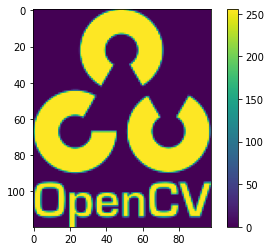

In [ ]:
plt.imshow(img[...,3])
plt.colorbar()